In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def scaling(X):
  m, n=X.shape
  for j in range(n):
    X[:,j]=(X[:,j]-np.mean(X[:,j]))/np.std(X[:,j])
  return X

In [22]:
def sig(z):
  return 1/(1+np.exp(-z))

In [23]:
def cost(X, Y, w, b, lamda):
  m,n=X.shape
  j=0

  for i in range(m):
    z=np.dot(X[i], w)+b
    f=sig(z)
    j+= Y[i]*(np.log(f))+(1-Y[i])*(np.log(1-f))

  j=(j/m)*(-1) + (lamda/(2*m))*np.dot(w, w)
  return j


In [24]:
def grad(X, Y, w, b, lamda):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.


  for i in range(m):
    f_wb_i = sig(np.dot(X[i],w) + b)
    err_i  = f_wb_i  - Y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]
    dj_db = dj_db + err_i
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  dj_dw = dj_dw + (lamda/m)*w

  return dj_db, dj_dw

In [25]:
def decen(X, Y, alpha, ittr, lamda):
  m,n=X.shape
  w=np.zeros((n,))
  b=0
  j=[]
  for i in range (ittr):
    dj_db, dj_dw=grad(X, Y, w, b, lamda)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    j.append(cost(X, Y, w, b, lamda))
    if (i%10==0):
      print(cost(X, Y, w, b, lamda))
  plt.plot(range(ittr), j)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost (j)')
  plt.title('Cost vs. Iterations')
  plt.show()
  return w, b

In [26]:
def logisticregression(X, Y, alpha, ittr, X_test, lamda):
  #X=scaling(X)
  w, b=decen(X, Y, alpha, ittr, lamda)
  m, n=X_test.shape
  Y_pred=np.zeros(m)
  for i in range(m):
    z=np.dot(X_test[i], w)+b
    f=sig(z)
    if f>=0.5:
      Y_pred[i]=1
    else:
      Y_pred[i]=0
  return Y_pred

In [11]:
def f1_score_binary(Y, y_cv):
    tp = np.sum((Y == 1) & (y_cv == 1))
    fp = np.sum((Y == 0) & (y_cv == 1))
    fn = np.sum((Y == 1) & (y_cv == 0))
    if (tp+fp == 0):
        pre = 0
    else:
        pre = tp / (tp + fp)

    if (tp+fn== 0):
        rec= 0
    else:
        rec = tp / (tp + fn)

    if (pre + rec) == 0:
        f1 = 0
    else:
        f1 = 2 * (pre * rec) / (pre + rec)

    return f1


In [30]:
data=np.array(pd.read_csv("binary_classification_train.csv"))
m,n = data.shape

In [31]:
#m=m//100     (for creditcard dataset)
X=np.zeros([m,n-2])
Y=np.zeros((m,))


for i in range (m):
  X[i]=data[i, 1:n-1]
  Y[i]=data[i,n-1]


In [14]:
print(X)

[[ -36.96309934  -15.01470294   87.10043472 ...  173.72298705
   -17.34916949  -82.55084389]
 [ -43.71567402   18.8471157    89.54340644 ...   11.59251925
  -106.12360525  -92.79642051]
 [ -30.73755019  -63.72964268  106.08133168 ...  164.83249783
   -37.41290151  -85.44115039]
 ...
 [ -35.345541    -80.69036019   94.40284293 ...  135.92923004
   -48.4083528   -75.40615407]
 [ -39.59406722  -63.80427731   52.27065677 ...  208.53435295
   -38.51438167  -85.69418917]
 [ -32.70246498 -111.47849646  109.34139873 ...  126.45446899
   -38.14487487  -86.07439614]]


In [ ]:
print(Y)

[0. 1. 0. ... 0. 0. 1.]


In [32]:
X_train=scaling(X)
Y_train=Y

In [16]:
m = X.shape[0]

ind = np.random.permutation(m)

spind = int(0.8 * m)

train_indices = ind[:spind]
val_indices = ind[spind:]

X_train = X[train_indices]
Y_train = Y[train_indices]
X_cv = X[val_indices]
Y_cv = Y[val_indices]


In [33]:
#k=m//5    (for creditcarddataset)
test=np.array(pd.read_csv("binary_classification_test.csv"))
k,n=test.shape
X_test=np.zeros([k,n-1])


for i in range (k):
  X_test[i]=test[i, 1:n]
X_test=scaling(X_test)
print(X_test)


[[ 2.42897685e+00 -3.02879227e-01 -5.62626580e-01 ...  3.40294279e-01
   2.03227402e-03 -1.06886488e+00]
 [ 8.60118430e-01 -3.59830261e-01  8.22035338e-01 ...  5.95997191e-01
   3.45664799e-01 -3.95258403e-01]
 [-2.95444741e-01 -1.36186819e+00  1.02169874e+00 ...  1.25625714e+00
   4.50675395e-01 -5.39505318e-01]
 ...
 [ 1.73104969e+00 -1.41930201e+00  1.04439174e+00 ...  4.98360846e-01
  -8.75559084e-01 -1.32744878e+00]
 [ 7.42482905e-01 -2.76218088e-01  6.06858124e-01 ...  9.58977298e-01
   5.79489472e-01 -4.85946876e-01]
 [ 1.58411999e+00 -2.23460030e+00 -1.09641451e-01 ...  8.85823743e-01
   1.14966111e+00  5.03278989e-01]]


In [17]:
lamda=0.01
ittr=500
alpha=0.1

0.6613458234439323
0.478477110508826
0.4007734153194577
0.3584719052658023
0.33215079904610345
0.3143678453314899
0.3016600373809685
0.29220091258465897
0.2849382802708111
0.2792246664467868
0.2746406506538643
0.27090311811291334
0.2678143931340353
0.26523250113926183
0.2630530006971633
0.26119746392883897
0.25960593630624146
0.2582318632697452
0.2570385932967617
0.2559969156959889
0.25508329380336847
0.2542785754857582
0.2535670375119954
0.2529356674783553
0.25237361739814657
0.25187178310542313
0.2514224770691367
0.2510191713889523
0.25065629410153173
0.25032906639490327
0.2500333715104787
0.249765648406676
0.24952280493041942
0.2493021464752881
0.24910131702212351
0.2489182501466635
0.24875112810065075
0.24859834747140178
0.24845849023169694
0.24833029922970673
0.2482126573544721
0.2481045697584216
0.24800514863378065
0.2479136001316288
0.24782921308574873
0.2477513492624589
0.24767943490544356
0.24761295338320055
0.2475514387785587
0.24749447028546673


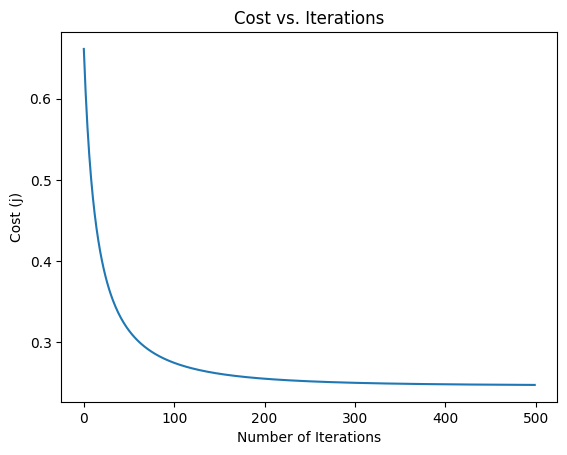

In [34]:
k=logisticregression(X_train, Y_train, alpha, ittr, X_test, lamda)


In [35]:
np.savetxt('logiesticregressiontest.csv', k, delimiter=',')

In [19]:
f1=f1_score_binary(Y_cv, k)


print(f"The F1 score after {ittr} itterations is {f1}")

The F1 score after 500 itterations is 0.8899005226774573
